### 1. Download geneset(s) of interest

In [ ]:
import gseapy
from geneclusters.benchmarking import save_gset

In [ ]:
# list all genesets
gene_sets = gseapy.get_library_name()
print(gene_sets)

In [ ]:
# run with internet
save_gset('HumanCyc_2016')

### 2. Run clustering algorithm(s)

#### K/L

In [144]:
from geneclusters.benchmarking import run_many_KL
from geneclusters.geneclusters import get_gene_pathway_matrix

In [148]:
# load gene-pathway matrix
matrix = get_gene_pathway_matrix('./HumanCyc_2016.npy')

# specify params
C = 0
KL_modified = True
random_labels = True
unweighted = True
N=10
size = 136

# run KL, multi iteration
run_many_KL(N, size, C, KL_modified, random_labels, unweighted, matrix)

100%|██████████| 10/10 [01:53<00:00, 11.40s/it]


In [ ]:
# what is the KL modified?

In [9]:
2+2

4

#### METIS

In [1]:
from geneclusters.geneclusters import get_gene_pathway_matrix
from geneclusters.benchmarking import make_symmetric, run_many_METIS

In [2]:
# load gene-pathway matrix
matrix = get_gene_pathway_matrix('./HumanCyc_2016.npy')

# make symmetric
full_mat = make_symmetric(matrix)

# define params
nparts = 8
N = 10

# run METIS, multi iteration
run_many_METIS(full_mat, matrix, nparts, N)

100%|██████████| 10/10 [00:01<00:00,  8.55it/s]


#### Spectral bisection

In [3]:
from geneclusters.benchmarking import make_symmetric
from geneclusters.geneclusters import run_SB, get_gene_pathway_matrix
import numpy as np

In [4]:
# load gene-pathway matrix
matrix = get_gene_pathway_matrix('./HumanCyc_2016.npy')

# make symmetric
full_mat = make_symmetric(matrix)

# define params
nclust = 8

# run spectral bisection
labels_sb, loss_sb = run_SB(nclust, full_mat, matrix)
np.save('./SB_labs.npy', labels_sb)
np.save('./SB_loss.npy', loss_sb)

#### Spectral clustering

In [6]:
from sklearn.cluster import SpectralClustering
from geneclusters.benchmarking import run_many_SPECTRAL, make_symmetric
from geneclusters.geneclusters import get_gene_pathway_matrix

In [8]:
# load gene-pathway matrix
matrix = get_gene_pathway_matrix('./HumanCyc_2016.npy')

# make symmetric
full_mat = make_symmetric(matrix)

# define params
nclust = 8
N = 10

# run spectral, multi iterations
run_many_SPECTRAL(full_mat, matrix, nclust, N)

  0%|          | 0/10 [00:00<?, ?it/s]/home/gridsan/djuna/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
 10%|█         | 1/10 [00:03<00:29,  3.32s/it]/home/gridsan/djuna/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
 20%|██        | 2/10 [00:16<01:11,  8.99s/it]/home/gridsan/djuna/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
 30%|███       | 3/10 [00:32<01:27, 12.44s/it]/home/gridsan/djuna/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
 40%

#### Random permutation

In [3]:
from geneclusters.benchmarking import run_many_RAND
from geneclusters.geneclusters import get_gene_pathway_matrix
import numpy as np

In [19]:
# load gene-pathway matrix
matrix = get_gene_pathway_matrix('./HumanCyc_2016.npy')

# get initial labs
labs_init = np.load('./kl_labs.npy')[0]

# define params 
N = 10

# run random permutations, multi init
run_many_RAND(N, labs_init, matrix)

100%|██████████| 10/10 [00:01<00:00,  7.52it/s]


### 3. Comparing clustering outputs

#### plot loss by method

In [101]:
import numpy as np
import seaborn as sns
import os
import pandas as pd
import matplotlib.pyplot as plt

<Axes: xlabel='loss', ylabel='method'>

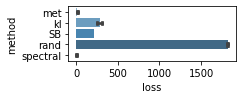

In [103]:
files = np.array(os.listdir('./'))
load = files[[x.endswith('loss.npy') for x in files]]
loss = []
names = []
for i in load:
    temp = np.load(i)
    loss.append(temp)
    names.append(np.repeat(i.split('_')[0], temp.size))
    
df = pd.DataFrame(np.hstack(loss))
df.columns = ['loss']
df['method'] = np.hstack(names)

plt.figure(figsize=(3,1))
sns.barplot(data=df, x="loss", y="method", estimator=np.mean, ci='sd', capsize=.2, color='lightblue', palette = "Blues_d")

#### plot jaccard indices

In [149]:
from geneclusters.geneclusters import get_gene_pathway_matrix, compute_jaccard_all_clust, get_rand_index
from geneclusters.benchmarking import make_symmetric
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'METIS')

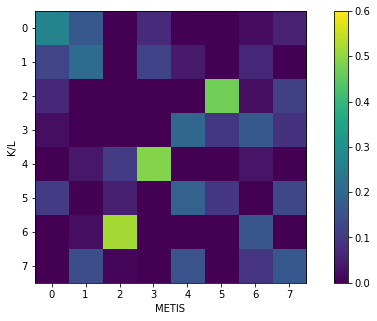

In [152]:
# load the labs / losses 
kl_loss = np.load('./kl_loss.npy')
kl_labs = np.load('./kl_labs.npy')

metis_loss = np.load('./met_loss.npy')
metis_labs = np.load('./met_labs.npy')

# plot jaccard
x = kl_labs[np.argmin(kl_loss)]
y = metis_labs[np.argmin(metis_loss)]

temp = compute_jaccard_all_clust(x, y)
plt.figure(figsize=(10,5))
plt.imshow(temp.T, cmap='viridis', vmax=.6, vmin=0)
plt.colorbar()
plt.ylabel('K/L')
plt.xlabel('METIS')

In [153]:
print('Rand index = ', get_rand_index(x, y))

Rand index =  0.8357328666537787


#### plot adjacency matrices

In [110]:
from geneclusters.geneclusters import get_gene_pathway_matrix
from geneclusters.benchmarking import make_symmetric
import matplotlib.pyplot as plt
import numpy as np

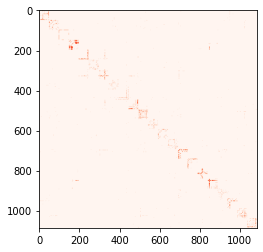

In [111]:
# load the labs / losses 
kl_loss = np.load('./kl_loss.npy')
kl_labs = np.load('./kl_labs.npy')

# load gene-pathway matrix
matrix = get_gene_pathway_matrix('./HumanCyc_2016.npy')

# make symmetric
full_mat = make_symmetric(matrix)

plt.imshow(full_mat[np.argsort(kl_labs[np.argmin(kl_loss)])][:,np.argsort(kl_labs[np.argmin(kl_loss)])], vmin=0, vmax=1, cmap='Reds')


### 4. Plotting clustering results

#### plot graph


In [217]:
from geneclusters.plotting_geneclusters import get_layout, plot_graph

In [254]:
kl_labs = np.load('./kl_labs.npy')
kl_loss = np.load('./kl_loss.npy')

# load gene-pathway matrix
matrix = get_gene_pathway_matrix('./HumanCyc_2016.npy')
pathway_names = matrix.index
gene_names = matrix.columns

# get dataframe
frame = pd.DataFrame(kl_labs[np.argmin(kl_loss)])
frame['description'] = np.concatenate([gene_names, pathway_names])
frame['is_gene'] = np.arange(frame.shape[0]) < matrix.shape[0]

# subset clusters of interest
frame = frame[[x in set([0,1,2]) for x in frame[0]]]
frame.columns = ['cluster', 'description', 'is_gene']

# subset the matrix
S = set(frame['description'])

col_index = np.where([x in S for x in matrix.columns])[0]
mat_sub = matrix.iloc[:,col_index]
mat_sub = mat_sub[[x in S for x in mat_sub.index]]


In [222]:
# plot graph
s=10000
graph, pos, cur_labels, unique_clusters, colors, layout = get_layout(frame, mat_sub.T, s, 15)


/home/gridsan/djuna/homer/github/geneclusters/geneclusters/plotting_geneclusters.py:124: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(*pos_curr[types_curr==0].T, color=col, zorder=5, s=S, cmap='tab20', edgecolor="black", linewidth=1)
/home/gridsan/djuna/homer/github/geneclusters/geneclusters/plotting_geneclusters.py:125: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(*pos_curr[types_curr==1].T, color=col, zorder=5, s=S, cmap='tab20', edgecolor="black", linewidth=1, marker='s')


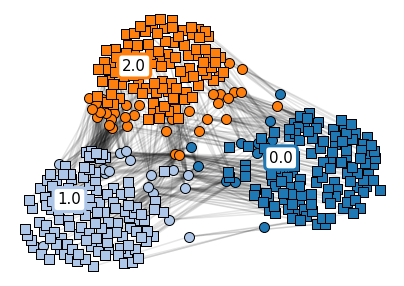

In [224]:
out_path = './'
plot_graph(layout, pos, graph, cur_labels, unique_clusters, colors, out_path)


#### show rep pathways

In [264]:
from geneclusters.plotting_geneclusters import get_representative_name_per_cluster

In [288]:
colnames = np.array(mat_sub.columns)
rownames = np.array(mat_sub.index)
N = 3
out = [get_representative_name_per_cluster(np.array(mat_sub), colnames, rownames, frame, x, N) for x in np.unique(frame['cluster'])]

for i in np.unique(frame['cluster']):
    print('\033[1mCluster ' + str(int(i)) + ' top pathways:\033[0m\n')
    
    for x in range(len(out[int(i)])):
        print(str(int(x)) + ') ' + out[int(i)][x]+'\n')

Cluster 0 top pathways:

0) valine degradation Homo sapiens VALDEG-PWY

1) leucine degradation Homo sapiens LEU-DEG2-PWY

2) isoleucine degradation Homo sapiens ILEUDEG-PWY

Cluster 1 top pathways:

0) &gamma;-linolenate biosynthesis Homo sapiens PWY-6000

1) icosapentaenoate biosynthesis II (metazoa) Homo sapiens PWY-7049

2) stearate biosynthesis Homo sapiens PWY-5972

Cluster 2 top pathways:

0) superpathway of purine nucleotide salvage Homo sapiens PWY66-409

1) purine nucleotides de novo biosynthesis Homo sapiens PWY-841

2) adenosine ribonucleotides de novo biosynthesis Homo sapiens PWY-7219

